# Project: Investigating TMDB Dataset

## Table of contents:

### 1.Introduction

### 2.Data Wrangling

### 3.Exploratory Data Analysis 

### 4.Conclusions



## Introduction

This dataset comes from IMDB and contains information about 10,000 movies, short films and tv series collected from The Movie Database (TMDb), including user ratings, revenue, runtime and budget.

In this project, i'll be answering the following questions:

- What month is considered "best" for releasing a films/shows?

- Is there relationship between budget and revenue?

- How has movie revenue changed over time?

- How does the movie's genre relate to revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


## Data Wrangling


### Explore General Properties of the Dataset

In [2]:
movies = pd.read_csv('movies.csv')
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
movies.duplicated().sum()

1

In [5]:
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning - Drop Unecessary Columns

Remove columns that are not useful for answering questions (Budget, Revenue, Homepage, Tagline, Keywords and Overview)


In [8]:
movies.drop(['budget','revenue','homepage','tagline',
             'keywords','overview','production_companies','cast','director'], axis = 1, inplace = True)

In [9]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

### Data Cleaning - Drop Duplicated Values

In [10]:
movies.drop_duplicates(inplace= True)

In [11]:
movies.duplicated().sum()

0

### Data Cleaning - Drop NaN Values

In [12]:
movies.dropna(axis= 0, inplace=True, how='any')

In [13]:
movies.isnull().sum()

id                0
imdb_id           0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Data Cleaning - Filling 0 Values

According to the data above, budget_adj, revenue_adj and runtime all contain values of 0. Fill these in with the average of each column.

In [14]:
mean1 = movies.runtime.mean() 
mean2 = movies.budget_adj.mean()
mean3 = movies.revenue_adj.mean()

In [15]:
movies['runtime']= movies['runtime'].replace(0,mean1)
movies['budget_adj']= movies['budget_adj'].replace(0,mean2)
movies['revenue_adj']=movies['revenue_adj'].replace(0,mean3)

In [16]:
movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04
mean,65811.569042,0.647776,102.445623,217.970833,5.973159,2001.308196,2.680629e+07,7.997484e+07
std,91927.169054,1.001316,30.798051,576.368151,0.933831,12.815839,3.053988e+07,1.367346e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10587.250000,0.208387,90.000000,17.000000,5.400000,1995.000000,1.760011e+07,5.151599e+07
50%,20541.500000,0.384587,99.000000,38.000000,6.000000,2006.000000,1.760011e+07,5.151599e+07
75%,75146.000000,0.715767,111.000000,146.000000,6.600000,2011.000000,2.094246e+07,5.151599e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning - Changing Datatypes

Change datatypes of columns to appropriate kinds. Ex. 'release_date' needs to be datetime.

In [17]:
movies['release_date']= pd.to_datetime(movies['release_date'])

In [18]:
movies.dtypes

id                         int64
imdb_id                   object
popularity               float64
original_title            object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

## Exploratory Data Analysis 

### Question 1: What month is considered "best" for releasing a films/shows?

 "Best" is a label that defines movies that have the top revenues. So i'll explore what month(s) have the highest average revenues.

In [19]:
movies.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [20]:
movies.shape

(10834, 12)

In [21]:
movies['release_month']= movies['release_date'].dt.month

In [22]:
movies.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [23]:
average_revenue_by_month= movies.groupby('release_month')['revenue_adj'].mean()
average_revenue_by_month

release_month
1     5.355242e+07
2     6.143254e+07
3     7.780038e+07
4     6.893235e+07
5     1.042665e+08
6     1.236609e+08
7     1.001103e+08
8     6.283457e+07
9     5.120320e+07
10    6.455339e+07
11    1.004709e+08
12    1.111045e+08
Name: revenue_adj, dtype: float64

Text(0, 0.5, 'Average Revenue')

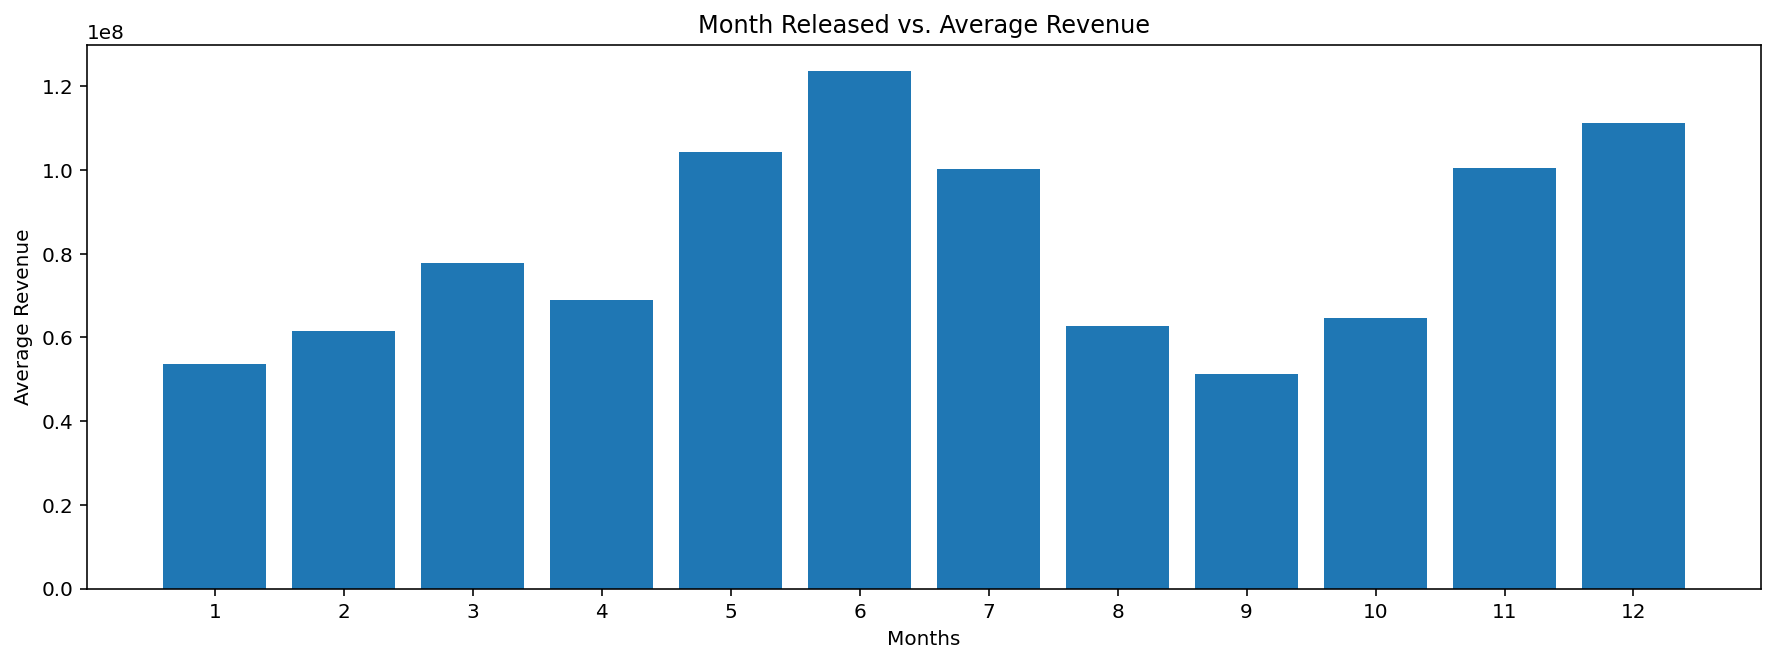

In [24]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12]
heights = average_revenue_by_month
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize = (15,5))
plt.bar(locations, heights, tick_label=labels)
plt.title('Month Released vs. Average Revenue')
plt.xlabel('Months')
plt.ylabel('Average Revenue')

From this chart, we can see that June and December have the highest average revenue for movie releases. Following are November, May and July. It seems that films have more revenues when they are released in middle and end of the year. 

### Question 2: Is there relationship between budget and revenue?



Text(0, 0.5, 'Revenue')

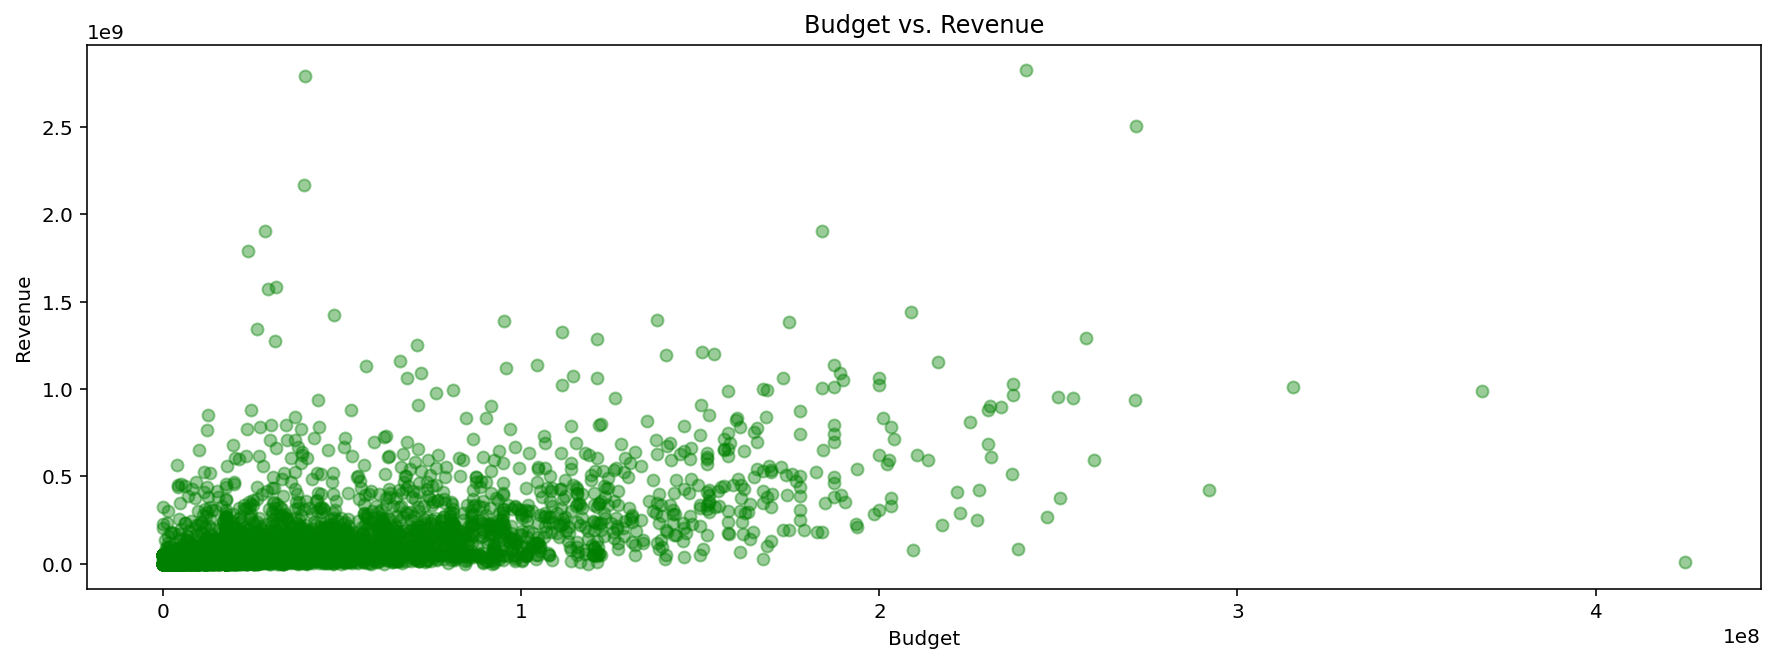

In [25]:
plt.figure(figsize = (15,5))
plt.scatter(movies['budget_adj'],movies['revenue_adj'],color = 'green', alpha = 0.4)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

There does not appear to be any correlation between budget and revenue.

### Question 3: How has movie revenue changed over time?

In [26]:
movies.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [27]:
revenue_year=movies.groupby('release_year')['revenue_adj'].mean().rolling(10).mean()
revenue_year

release_year
1960             NaN
1961             NaN
1962             NaN
1963             NaN
1964             NaN
1965             NaN
1966             NaN
1967             NaN
1968             NaN
1969    9.678421e+07
1970    1.007619e+08
1971    9.712981e+07
1972    9.888406e+07
1973    1.053572e+08
1974    1.065385e+08
1975    1.052777e+08
1976    1.093767e+08
1977    1.107166e+08
1978    1.131885e+08
1979    1.157820e+08
1980    1.130144e+08
1981    1.130382e+08
1982    1.121909e+08
1983    1.058202e+08
1984    1.025808e+08
1985    9.770158e+07
1986    9.462635e+07
1987    8.537975e+07
1988    8.211523e+07
1989    7.943811e+07
1990    7.972894e+07
1991    8.000643e+07
1992    7.961794e+07
1993    7.942400e+07
1994    7.999279e+07
1995    8.238049e+07
1996    8.373199e+07
1997    8.605199e+07
1998    8.762118e+07
1999    8.778021e+07
2000    8.768647e+07
2001    8.884821e+07
2002    8.890408e+07
2003    8.996920e+07
2004    9.029526e+07
2005    8.819501e+07
2006    8.685614e+07


([<matplotlib.axis.XTick at 0x7f8934198210>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

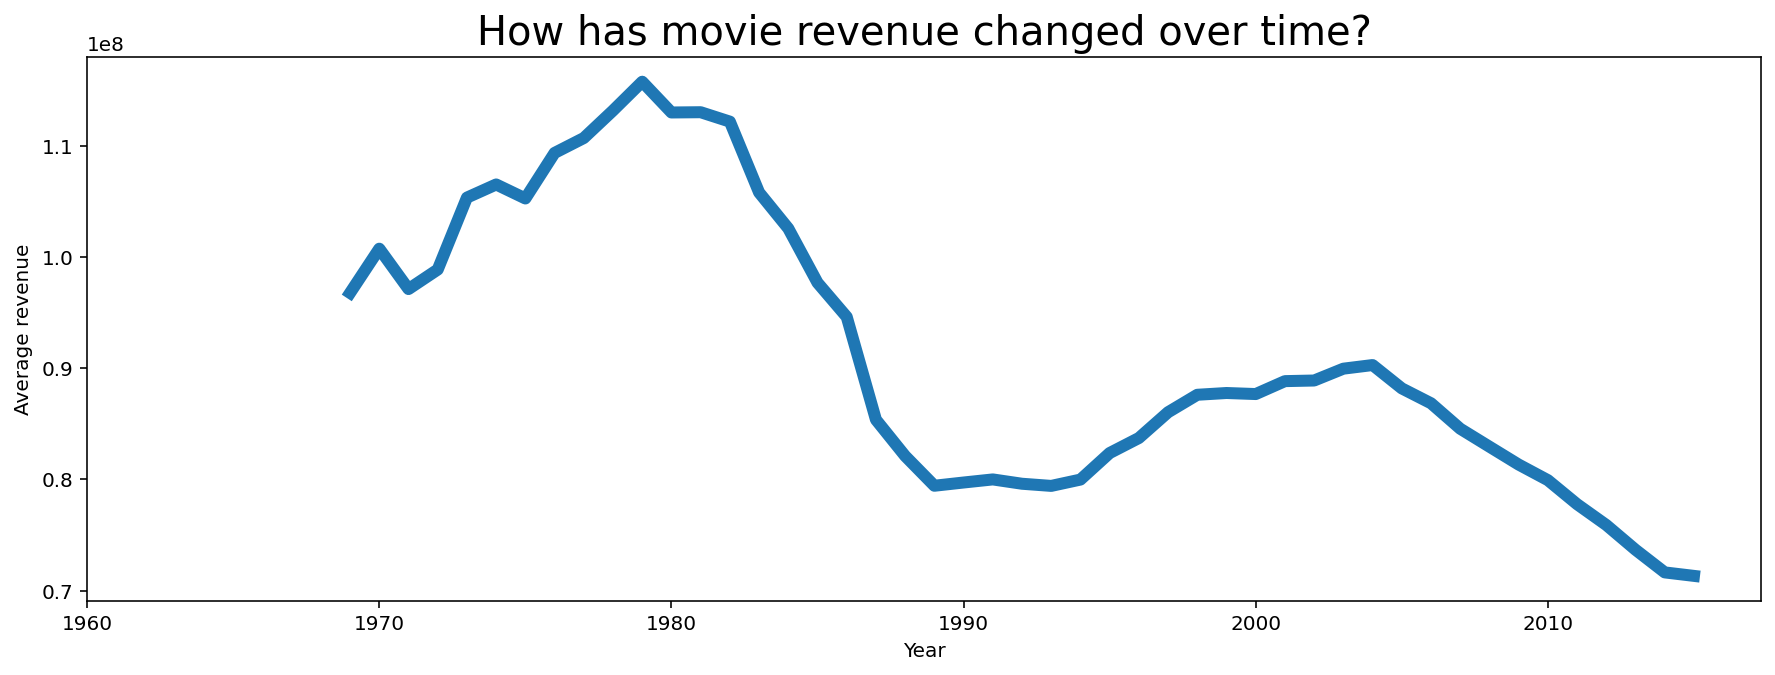

In [28]:
plt.figure(figsize=(15,5))
plt.plot(revenue_year.index,revenue_year, linewidth=6)
plt.title ('How has movie revenue changed over time?', fontsize=20)
plt.xlabel ('Year', fontsize=10)
plt.ylabel ('Average revenue', fontsize=10)
plt.xticks(np.arange(1960, 2015, step=10),fontsize=10 )

1980s seems to generate the higest revenue as compared to other periods. Revenue of film industry has been reducing over year since 1980.

### Question 4: How does the movie's genre relate to revenue?


In [29]:
movies.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [30]:
genres_set = set()
for genres in movies['genres'].iteritems():  
    for genre in genres[1].split('|'):
        genres_set.add(genre)
print(sorted(genres_set))

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [31]:
for genre in genres_set:
    movies[genre]=movies['genres'].str.contains(genre)

movies.iloc[:,13:].head(5)

,Music,Horror,Science Fiction,Fantasy,Adventure,Family,Romance,Drama,Action,History,Thriller,War,Foreign,Crime,Comedy,Animation,Western,TV Movie,Mystery,Documentary
0,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False


In [32]:
genre_rev_adj_means_dict = {
    'mean_revenue_adj': {}
}

for genre in genres_set:
    mean_rev_adj = movies[movies[genre]]['revenue_adj'].mean()
    genre_rev_adj_means_dict['mean_revenue_adj'][genre] = mean_rev_adj
print(genre_rev_adj_means_dict)

{'mean_revenue_adj': {'Music': 74743608.01141813, 'Horror': 57944165.77211185, 'Science Fiction': 114186009.73065662, 'Fantasy': 137103733.45949563, 'Adventure': 163821149.3234116, 'Family': 117838091.86465473, 'Romance': 73326301.35349284, 'Drama': 67328980.65952599, 'Action': 116182475.4688805, 'History': 75865930.14371361, 'Thriller': 81584593.52190457, 'War': 95362506.19534363, 'Foreign': 44805615.559304185, 'Crime': 78741866.90790653, 'Comedy': 75365805.96313798, 'Animation': 119499837.54995607, 'Western': 77323074.77383207, 'TV Movie': 51557143.470780335, 'Mystery': 76329289.6219695, 'Documentary': 43654019.387907945}}


In [33]:
df_mean_rev_adj_genre = pd.DataFrame.from_dict(genre_rev_adj_means_dict)
df_mean_rev_adj_genre.sort_values(by=['mean_revenue_adj'], inplace=True)
print(df_mean_rev_adj_genre)

                 mean_revenue_adj
Documentary          4.365402e+07
Foreign              4.480562e+07
TV Movie             5.155714e+07
Horror               5.794417e+07
Drama                6.732898e+07
Romance              7.332630e+07
Music                7.474361e+07
Comedy               7.536581e+07
History              7.586593e+07
Mystery              7.632929e+07
Western              7.732307e+07
Crime                7.874187e+07
Thriller             8.158459e+07
War                  9.536251e+07
Science Fiction      1.141860e+08
Action               1.161825e+08
Family               1.178381e+08
Animation            1.194998e+08
Fantasy              1.371037e+08
Adventure            1.638211e+08


Text(0, 0.5, 'Average Revenue')

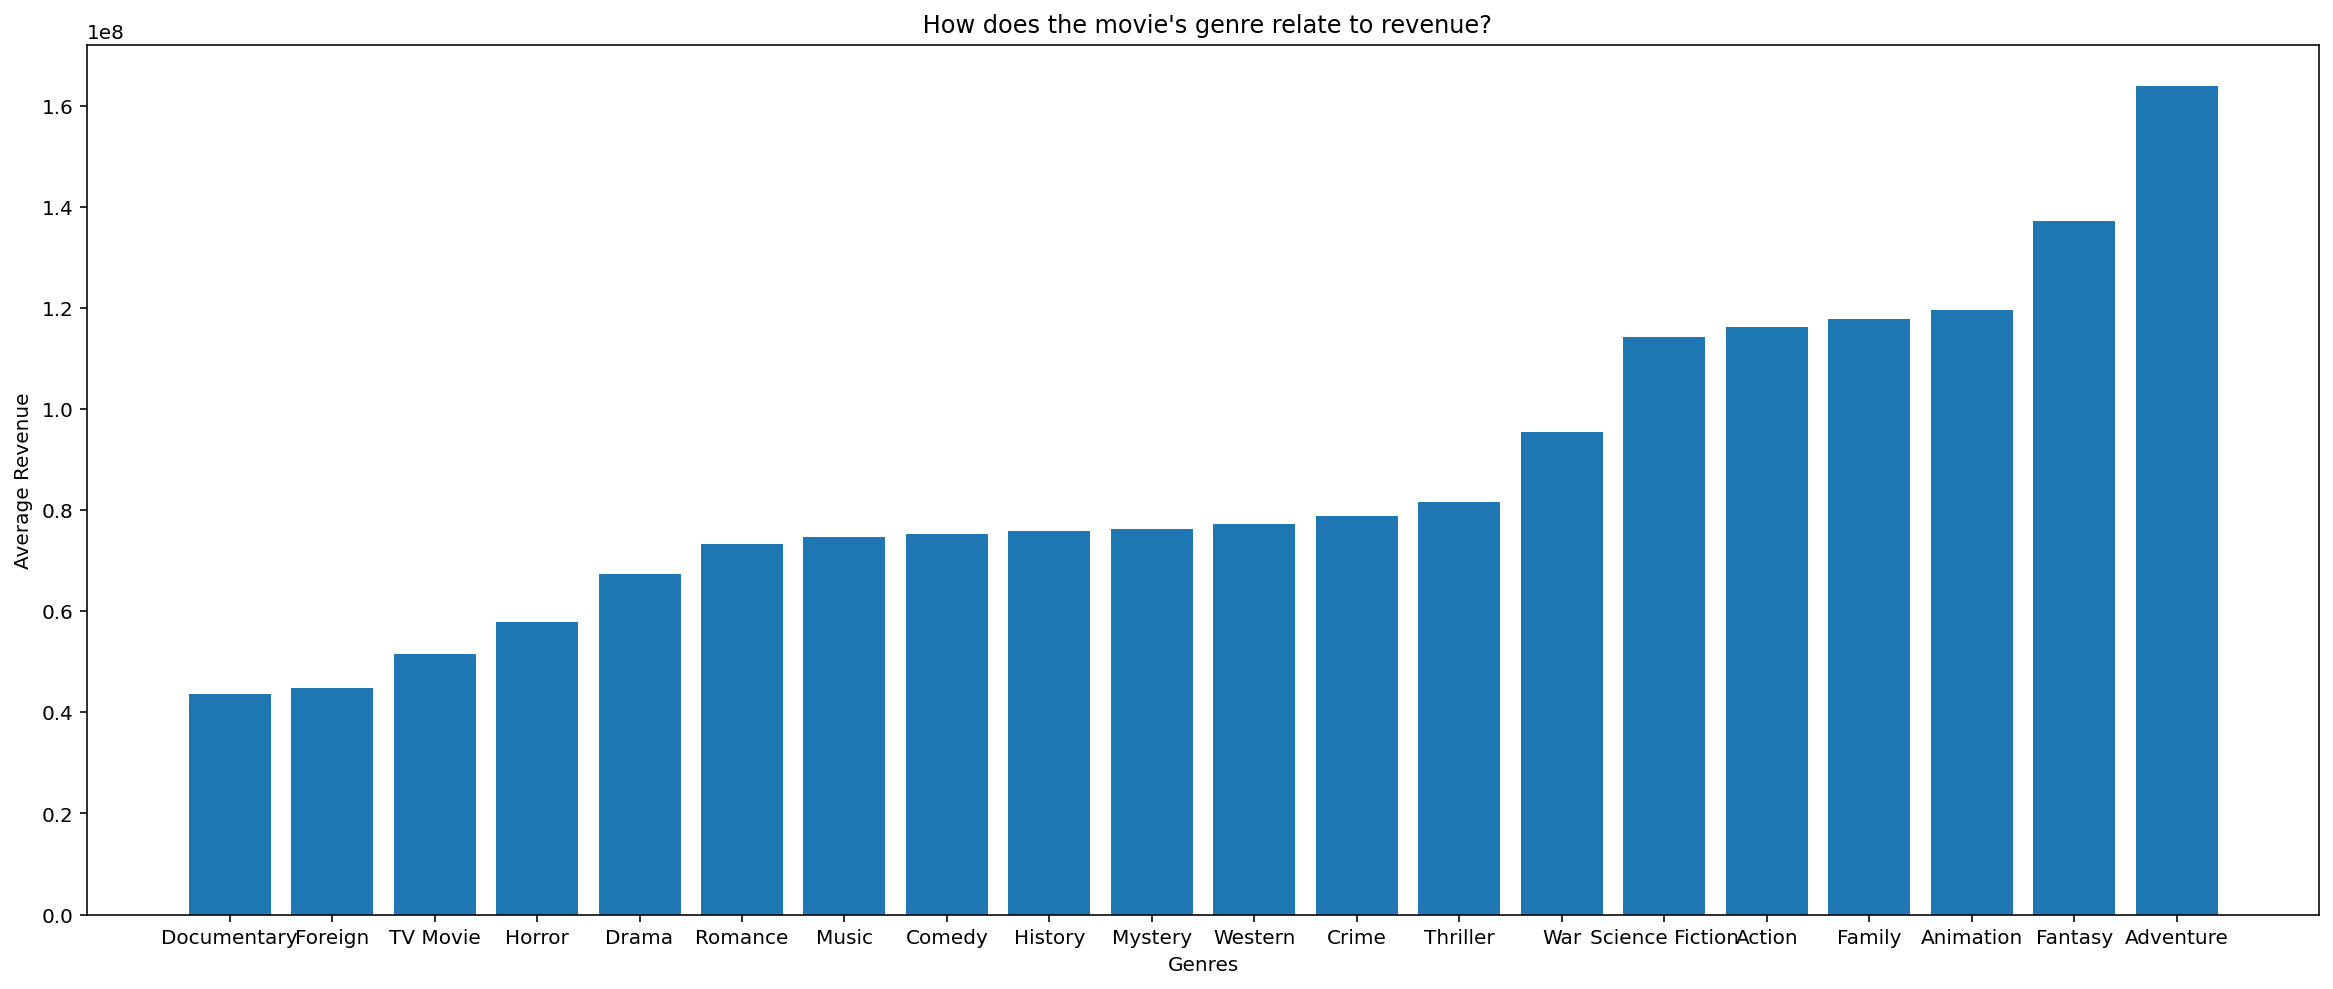

In [45]:
def bar_chart(locations, heights,labels):
    plt.figure(figsize = (20,8))
    plt.bar(locations, heights, tick_label=labels)
    return plt

bar_chart(df_mean_rev_adj_genre.index,df_mean_rev_adj_genre['mean_revenue_adj'],df_mean_rev_adj_genre.index)
plt.title(' How does the movie\'s genre relate to revenue?')
plt.xlabel('Genres')
plt.ylabel('Average Revenue')

As can be seen, Adventure genre creates the highest revenue, following by Fantasy and Animation. Documentary, Foreign and TV movie create the least revenue. 

### Question 4: Do top ratings movies always generate big revenue?

In [35]:
movies.vote_average.describe()

count    10834.000000
mean         5.973159
std          0.933831
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [36]:
bin_edges = [1.5 , 5.4, 6.0, 6.6, 9.2]
bin_names = ['low rating', 'moderate low rating','moderate high rating', 'high rating']
movies['rating_level'] = pd.cut(movies['vote_average'],bin_edges, labels = bin_names )
movies.head(1)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,...,War,Foreign,Crime,Comedy,Animation,Western,TV Movie,Mystery,Documentary,rating_level
0,135397,tt0369610,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,...,False,False,False,False,False,False,False,False,False,moderate high rating


In [49]:
rating_level_avg= movies.groupby('rating_level')['revenue_adj'].mean()
rating_level_avg

rating_level
low rating              5.125883e+07
moderate low rating     7.015120e+07
moderate high rating    8.820418e+07
high rating             1.137425e+08
Name: revenue_adj, dtype: float64

Text(0, 0.5, 'Average Revenue')

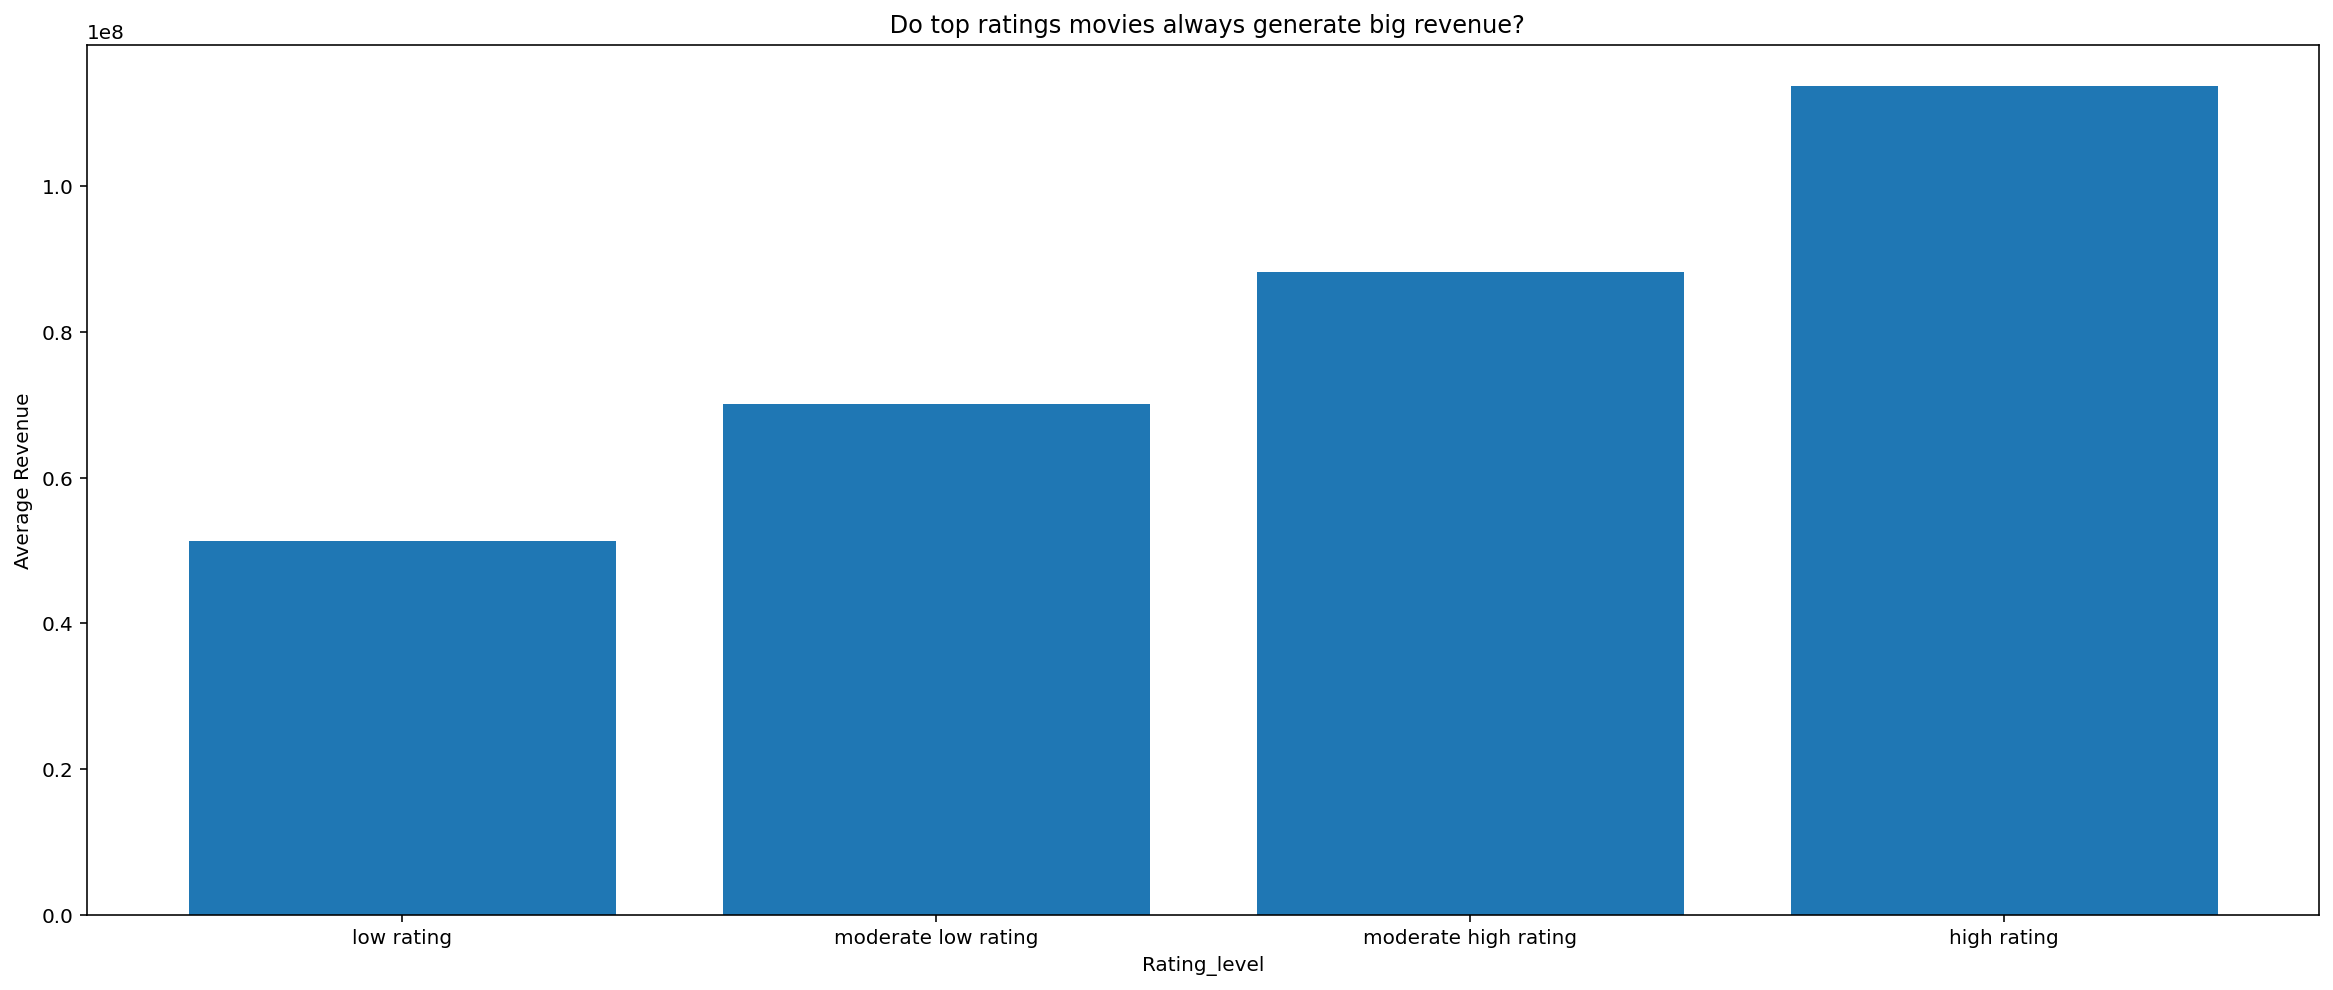

In [52]:
def bar_chart(locations, heights,labels):
    plt.figure(figsize = (20,8))
    plt.bar(locations, heights, tick_label=labels)
    return plt

bar_chart(rating_level_avg.index,rating_level_avg,rating_level_avg.index)
plt.title(' Do top ratings movies always generate big revenue?')
plt.xlabel('Rating_level')
plt.ylabel('Average Revenue')

It seems that high_rating movies generate high revenue. 

## Conclusions

To be concluded, there is no relationship between budget and revenue, means films with high investment does not lead to higher revenue. Films released in summer time or in the end of the year seem to bring higher revenue than films which are released in other times of the year. Revenue of film industry is declined from 1980 and have a tendency to decrease more. Adventure film brings the higest revenue. Documentary and Foreign movies seem not to be attactive to the audiences as they bring the least revenue to film industry. High rating movies bring high revenue to the industry. 

### Limitations Of The Data Set

Analysis is limited to only the provided data. For example, the data set does not confirm that the director of every movie is listed.

Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationships being analyzed. This could also cause increased disparities of representation for certain groups of data, in addition to any already present in the data set.
